In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from os.path import exists

In [2]:
path = {}
beta = 0.9

# dir_path = 'save_results/fedavg_curr_lg_loss/cifar100/noniid-labeldir/'
dir_path = 'save_results/fedprox_curr/cifar100/noniid-labeldir/'

path['curr'] = f'{dir_path}logs_curr_linear_0.8a_0.2b_{beta}beta.txt'
path['rand'] = f'{dir_path}logs_rand_linear_0.8a_0.2b_{beta}beta.txt'
path['anti'] = f'{dir_path}logs_anti_linear_0.8a_0.2b_{beta}beta.txt'
path['vani'] = f'{dir_path}logs_vanilla_{beta}beta.txt'

# path['curr'] = 'save_results/fedavg_curr_lg_loss/cifar100/noniid-labeldir/logs_curr_linear_0.8a_0.2b_0.05beta.txt'
# path['rand'] = 'save_results/fedavg_curr_lg_loss/cifar100/noniid-labeldir/logs_rand_linear_0.8a_0.2b_0.05beta.txt'
# path['anti'] = 'save_results/fedavg_curr_lg_loss/cifar100/noniid-labeldir/logs_anti_linear_0.8a_0.2b_0.05beta.txt'
# path['vani'] = 'save_results/fedavg/cifar100/noniid-labeldir/logs_vanilla_0.05beta.txt'

In [3]:
acc = defaultdict(list)

algorithms = ['curr', 'rand', 'anti', 'vani']
for i, alg in enumerate(algorithms):
    if not exists(path[alg]):
        del algorithms[i]
    else:
        with open(path[alg]) as f:
            while True:
                line = f.readline()

                if '----- ROUND' in line:
                    idx_round = int(line.split()[2])
                    if len(acc[alg]) < idx_round:
                        acc[alg].append([])

                if '-- Global Acc:' in line:
                    acc[alg][idx_round-1].append(float(line.split()[3][:-1]))

                if not line:
                    break

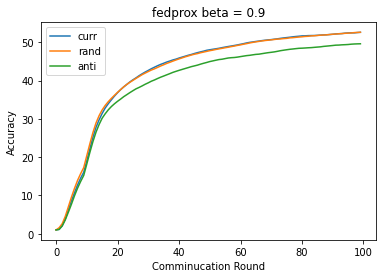

In [4]:
for alg in algorithms:
    if len(acc[alg][-1]) == 3: # algorithm complete
        accuracy = np.array(acc[alg]).mean(1)
        avg_acc = [accuracy[:r + 1][-10:].mean() for r in range(len(accuracy))]
        plt.plot(np.arange(100), avg_acc, label=alg)
plt.ylabel('Accuracy')
plt.xlabel('Comminucation Round')
plt.legend(loc="best")
# plt.title(f'fedavg beta = {beta}')
plt.title(f'fedprox beta = {beta}')
plt.show()